# **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de um shopping.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [357]:
import numpy as np
import pandas as pd

In [358]:
import warnings
warnings.filterwarnings("ignore")

In [359]:
df = pd.read_csv('Mall_Customers.csv')

In [360]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**IDADE**

In [361]:
import plotly.express as px

In [362]:
hist = px.histogram(df, x='Age', nbins=60)
hist.update_layout(width=600,height=400,title_text='Distribuição das idades')
hist.show()

**GÊNERO**

In [363]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

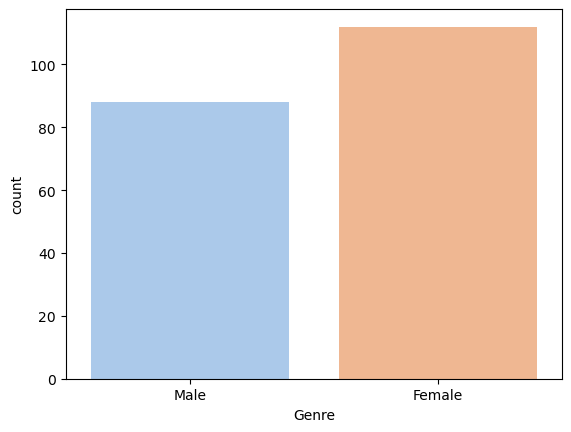

In [364]:
import seaborn as sns
sns.countplot(x='Genre', data=df, palette='pastel');

In [365]:
df.shape

(200, 5)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

In [366]:
df.rename(columns={'CustomerID': 'identificacao', 'Genre': 'genero', 'Age': 'idade', 'Annual Income (k$)': 'renda_anual', 'Spending Score (1-100)': 'pontuacao'}, inplace=True)

In [367]:
df.head(3)

,identificacao,genero,idade,renda_anual,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


**Valores Missing (NAN)**

In [368]:
df.isnull().sum()

identificacao    0
genero           0
idade            0
renda_anual      0
pontuacao        0
dtype: int64

**Análise dos tipos de atributos.**

In [369]:
df.dtypes

identificacao     int64
genero           object
idade             int64
renda_anual       int64
pontuacao         int64
dtype: object

**Dados Estatísticos**

In [370]:
df.describe()

,identificacao,idade,renda_anual,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Análise dos outliers**

In [371]:
import plotly.express as px

In [372]:
boxplot = px.box(df, y="renda_anual")
boxplot.show()

In [373]:
boxplot = px.box(df, y="idade")
boxplot.show()

## **PRÉ-PROCESSAMENTO**

In [374]:
boxplot = px.box(df, y="pontuacao")
boxplot.show()

**Excluir identificação do cliente**

In [375]:
df2 = df.drop(labels='identificacao', axis=1)

In [376]:
df2.head(2)

,genero,idade,renda_anual,pontuacao
0,Male,19,15,39
1,Male,21,15,81


**Transformar variáveis categóricas em numéricas**

In [377]:
df2['genero'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [378]:
df2.head(3)

,genero,idade,renda_anual,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [379]:
from sklearn.preprocessing import StandardScaler

In [380]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [381]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## **K-MEANS COM DOIS ATRIBUTOS**

In [382]:
df2

,genero,idade,renda_anual,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [383]:
dados = df2.iloc[:, [2,3]].values
dados

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Elbow Method**

In [384]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=300, n_init=10)
    kmeans.fit(dados)
    wcss.append(kmeans.inertia_)

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns

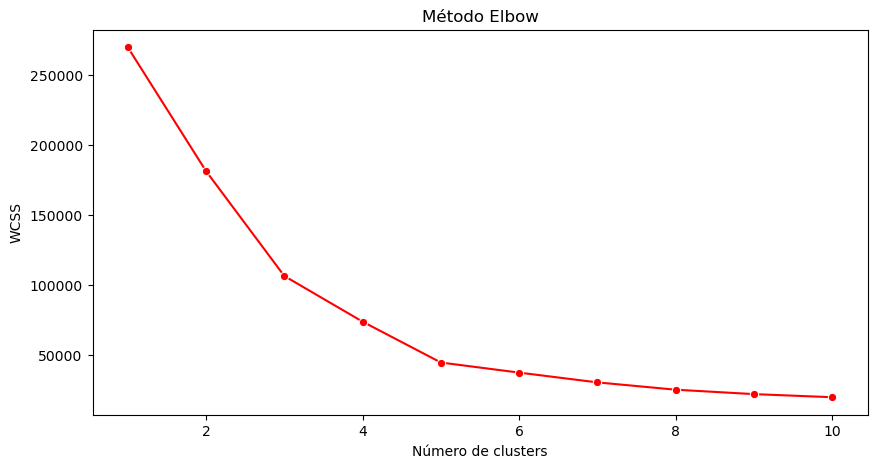

In [386]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [387]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=300)

In [388]:
kmeans1 = kmeans.fit(dados)

In [389]:
# Coordenadas dos centróides
centroides = kmeans1.cluster_centers_
centroides

array([[26.30434783, 20.91304348],
       [48.26      , 56.48      ],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

In [390]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [391]:
import plotly.express as px
import plotly.graph_objects as go

In [392]:
graf1 = px.scatter(x=dados[:,0], y=dados[:,1], color=classificacao)
graph2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size=[15, 15, 15, 15])
graf3 = go.Figure(data= graf1.data + graph2.data)
graf3.update_layout(width=800, height=500, title_text='Agrupamento K-Means')
graf3.update_xaxes(title_text='Renda Anual (k$)')
graf3.update_yaxes(title_text='Pontuação de Gastos (1-100)')
graf3.show()

In [393]:
agrupamento = pd.DataFrame(classificacao, columns=['grupo'])
agrupamento

,grupo
0,0
1,1
2,0
3,1
4,0
...,...
195,3
196,2
197,3
198,2


In [394]:
df3 = pd.concat([df, agrupamento], axis=1)
df3

,identificacao,genero,idade,renda_anual,pontuacao,grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [395]:
df3.iloc[150, :]

identificacao     151
genero           Male
idade              43
renda_anual        78
pontuacao          17
grupo               2
Name: 150, dtype: object

In [396]:
df3.loc[df3['identificacao'] == 92]

,identificacao,genero,idade,renda_anual,pontuacao,grupo
91,92,Male,18,59,41,1


In [397]:
grupo0 = df3[df3['grupo'] == 0]
grupo0.head()

,identificacao,genero,idade,renda_anual,pontuacao,grupo
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0


In [398]:
grupo0.shape

(23, 6)

In [399]:
grupo1 = df3[df3['grupo'] == 1]
grupo1.head()

,identificacao,genero,idade,renda_anual,pontuacao,grupo
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1


In [400]:
grupo1.shape

(100, 6)

In [401]:
grupo2 = df3[df3['grupo'] == 2]
grupo2.head()

,identificacao,genero,idade,renda_anual,pontuacao,grupo
124,125,Female,23,70,29,2
126,127,Male,43,71,35,2
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
132,133,Female,25,72,34,2


In [402]:
grupo2.shape

(38, 6)

In [403]:
grupo3 = df3[df3['grupo'] == 3]
grupo3.head()

,identificacao,genero,idade,renda_anual,pontuacao,grupo
123,124,Male,39,69,91,3
125,126,Female,31,70,77,3
127,128,Male,40,71,95,3
129,130,Male,38,71,75,3
131,132,Male,39,71,75,3


In [404]:
grupo3.shape

(39, 6)

## **KMEANS COM TODOS ATRIBUTOS**

In [405]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [406]:
df2_esc.shape

(200, 4)

**Elbow Method**

In [407]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=300, n_init=10)
    kmeans.fit(df2_esc)
    wcss.append(kmeans.inertia_)

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Número de clusters')

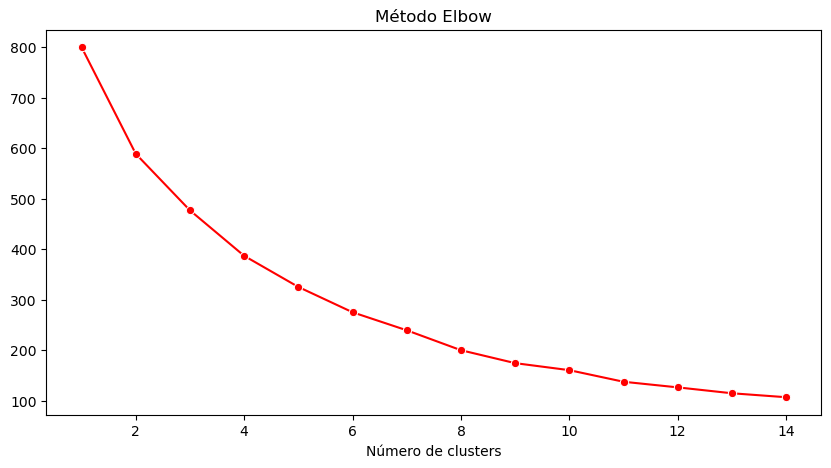

In [409]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 15), y=wcss, marker='o', color='red')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')

**Agrupamento**

In [410]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=5, max_iter=300)

In [411]:
kmeans2 = kmeans.fit(df2_esc)

In [412]:
# Coordenadas dos centróides
centroides = kmeans2.cluster_centers_
centroides

array([[-0.88640526,  0.70849671, -0.00229017, -0.56133101],
       [ 0.04339047, -0.44191719,  0.99158305,  1.23950275],
       [ 1.12815215,  1.33075947, -0.48486081, -0.42786906],
       [ 1.12815215, -1.02205127, -0.75821082,  0.43783969],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355]])

In [413]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[-2.77555756e-16,  4.87222222e+01,  6.05000000e+01,
         3.57407407e+01],
       [ 4.61538462e-01,  3.26923077e+01,  8.65384615e+01,
         8.21282051e+01],
       [ 1.00000000e+00,  5.73928571e+01,  4.78571429e+01,
         3.91785714e+01],
       [ 1.00000000e+00,  2.46086957e+01,  4.06956522e+01,
         6.14782609e+01],
       [ 1.00000000e+00,  3.84736842e+01,  8.58947368e+01,
         1.42105263e+01],
       [ 1.66533454e-16,  2.59459459e+01,  4.22162162e+01,
         5.74594595e+01]])

In [414]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([3, 3, 5, 5, 5, 5, 0, 5, 2, 5, 2, 5, 0, 5, 2, 3, 5, 3, 2, 5, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 5, 2, 5, 2, 3, 0, 5, 0, 5, 0, 5, 0, 3, 2, 5,
       0, 5, 0, 5, 5, 5, 0, 3, 5, 2, 0, 2, 0, 2, 5, 2, 2, 3, 0, 0, 2, 3,
       0, 0, 3, 5, 2, 0, 0, 0, 2, 3, 0, 2, 5, 0, 2, 3, 2, 0, 5, 2, 0, 5,
       5, 0, 0, 3, 2, 0, 5, 3, 0, 5, 2, 3, 5, 0, 2, 3, 2, 5, 0, 2, 2, 2,
       2, 5, 0, 3, 5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 5, 1, 4, 1, 2, 1, 4, 1,
       5, 1, 4, 1, 0, 1, 4, 1, 0, 1, 5, 1, 4, 1, 4, 1, 0, 1, 4, 1, 0, 1,
       0, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 0, 1,
       4, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1], dtype=int32)

In [418]:
classificacao2[199]

np.int32(1)

In [419]:
agrupamento2 = pd.DataFrame(classificacao2, columns=['grupo'])
agrupamento2

,grupo
0,3
1,3
2,5
3,5
4,5
...,...
195,1
196,0
197,1
198,4


In [420]:
df4 = pd.concat([df, agrupamento2], axis=1)
df4

,identificacao,genero,idade,renda_anual,pontuacao,grupo
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,5
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [421]:
df4.iloc[150, :]

identificacao     151
genero           Male
idade              43
renda_anual        78
pontuacao          17
grupo               4
Name: 150, dtype: object

In [422]:
df4.loc[df4['identificacao'] == 76]

,identificacao,genero,idade,renda_anual,pontuacao,grupo
75,76,Male,26,54,54,3


In [423]:
grupo0 = df4[df4['grupo'] == 0]
grupo0.shape

(54, 6)

In [427]:
grupo1 = df4[df4['grupo'] == 1]
grupo1.shape

(39, 6)

In [428]:
grupo2 = df4[df4['grupo'] == 2]

In [429]:
grupo3 = df4[df4['grupo'] == 3]
grupo3.shape

(23, 6)

In [432]:
grupo4 = df4[df4['grupo'] == 4]
grupo4.shape

(19, 6)

In [433]:
grupo5 = df4[df4['grupo'] == 5]
grupo5.shape

(37, 6)